## 6.2. 

**Developing a model to predict permeability (see Sect. 1.4) could save significant resources for a pharmaceutical company, while at the same time more rapidly identifying molecules that have a sufficient permeability to become a drug:**

**(a) Load the data.**

**(b) The fingerprint predictors indicate the presence or absence of substructures of a molecule and are often sparse meaning that relatively few of the molecules contain each substructure. Filter out the predictors that have low frequencies using the nearZeroVar function from the caret package.**

**How many predictors are left for modeling?**

Freq Predictors\
0     38\
1    296\
2    151\
3     59\
4     51\
5     48\
6     30\
7     21\
8     25\
9     19\
Over 485 predictors have fewer than 3 active flags, these predictors are removed.

**(c) Split the data into a training and a test set, pre-process the data, and tune a PLS model. How many latent variables are optimal and what is the corresponding resampled estimate of R2?**

**(d) Predict the response for the test set. What is the test set estimate of R2?**

**(e) Try building other models discussed in this chapter. Do any have better predictive performance?**

**(f) Would you recommend any of your models to replace the permeability
laboratory experiment?**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import boxcox

from linearmodels import 

In [88]:
fingerprints = pd.read_csv("data/fingerprints.csv", index_col="ID", header=0)
permeability = pd.read_csv("data/permeability.csv", index_col="ID", header=0)

data = pd.concat([fingerprints, permeability], axis="columns")

In [11]:
n_zeros = (fingerprints == 0).sum(axis="rows")

In [69]:
aa = n_zeros.apply(lambda x:x if x < 83 else 165-x)

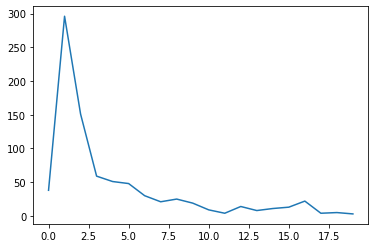

In [72]:
plt.plot(aa.value_counts().sort_index(ascending=True)[:20])
plt.show()

In [89]:
min_freq = 3
max_freq = len(data)-min_freq
sparse_vars = list(n_zeros[(n_zeros<min_freq)|(n_zeros>max_freq)].index)
non_sparse = data.drop(columns=sparse_vars)

In [110]:
seed = 5
w_sparse={}
n_sparse={}
y={}

# Setting indexes
train_val, test = train_test_split(data, random_state=seed, shuffle=True, test_size=0.2)
train, val = train_test_split(data, random_state=seed, shuffle=True, test_size=0.2)
train, val, train_val, test = train.index, val.index, train_val.index, test.index

# Using indexes to seperate datasets
w_ = data.drop(columns=["permeability"])
w_sparse["train"] = w_.loc[train, :]
w_sparse["val"] = w_.loc[val, :]
w_sparse["train_val"] = w_.loc[train_val, :]
w_sparse["test"] = w_.loc[test, :]

n_ = data.drop(columns=["permeability"] + sparse_vars)
n_sparse["train"] = n_.loc[train, :]
n_sparse["val"] = n_.loc[val, :]
n_sparse["train_val"] = n_.loc[train_val, :]
n_sparse["test"] = n_.loc[test, :]

y_ = data["permeability"]
y["train"] = y_.loc[train]
y["val"] = y_.loc[val]
y["train_val"] = y_.loc[train_val]
y["test"] = y_.loc[test]

In [118]:
pls_scores = []
for i in range(1, len(w_sparse["train"])):
    pls = PLSRegression(n_components=i)
    pls.fit(X=w_sparse["train"], Y=y["train"])
    pls_scores.append(pls.score(X=w_sparse["val"], y=y["val"]))

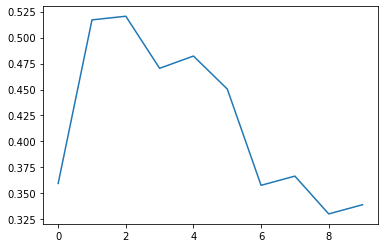

In [122]:
plt.plot(pls_scores[:10])
plt.show()

In [124]:
pls_scores_n = []
for i in range(1, len(n_sparse["train"])):
    pls = PLSRegression(n_components=i)
    pls.fit(X=n_sparse["train"], Y=y["train"])
    pls_scores_n.append(pls.score(X=n_sparse["val"], y=y["val"]))

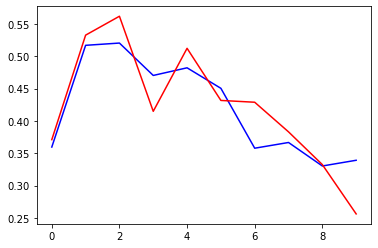

In [125]:
plt.plot(pls_scores[:10], c="b")
plt.plot(pls_scores_n[:10], c="r")
plt.show()